# Проект: Исследование стартапов

- Автор: Захаров А.С.
- Дата: 11.02.2025

## Введение

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Данные состоят из семи датасетов, содержащих следующую информацию:

- `acquisition.csv` — информация о покупках одними компаниями других компаний;
- `company_and_rounds.csv` — информация о компаниях и раундах финансирования;
- `education.csv` — информация о об образовании сотрудника;
- `people.csv` — информация о сотрудниках;
- `degrees.csv` — информация о типе образования сотрудника;
- `fund.csv` — информация о фондах;
- `investment.csv` — информация о раундах инвестирования.


#### Описание датасета `acquisition`

- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

#### Описание датасета `company_and_rounds`

- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

#### Описание датасета `education`

- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

#### Описание датасета `people`

- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

#### Описание датасета `degrees`

- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

#### Описание датасета `fund`

- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

#### Описание датасета `investment`

- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.


### 1.1. Вывод общей информации, исправление названия столбцов

Начнём с загрузки библиотек и датасетов 
- company_and_rounds.csv
- acquisition.csv
- people.csv
- education.csv
- degrees.csv
- fund.csv
- investment.csv

Данные датасетов сохраним в переменных: 
- candr_df (company_and_rounds.csv)
- acq_df (acquisition.csv)
- people_df (people.csv)
- educ_df (education.csv)
- degr_df (degrees.csv)
- fund_df (fund.csv)
- invest_df (investment.csv)

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загрузим библиотеки для визуализации данных
import matplotlib.pyplot as plt


In [2]:
# Выгрузим данные в переменные
PATH = "https://code.s3.yandex.net/datasets/"
acq_df = pd.read_csv(PATH + 'acquisition.csv')
candr_df = pd.read_csv(PATH + 'company_and_rounds.csv')
educ_df = pd.read_csv(PATH + 'education.csv')
people_df = pd.read_csv(PATH + 'people.csv')
degr_df = pd.read_csv(PATH + 'degrees.csv')
fund_df = pd.read_csv(PATH + 'fund.csv')
invest_df = pd.read_csv(PATH + 'investment.csv')

In [3]:
# Выведем первые строки датафрейма `acq_df` на экран
acq_df.head(15)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


In [4]:
# Выведем информацию о датафрейме `acq_df`
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбцах `id`, `acquiring_company_id` и `acquired_company_id` представлены типом данных `int64`. Размерность этих столбцов можно оптимизировать.
- Столбец `price_amount` со стоимости покупок представлен типом данных `int64`.Следует привести к типу `float64`.
- Cтолбцы `term_code` и `acquired_at`представлены данными в формате `object`. Столбец `acquired_at`, содержащий информацию о дате следует привести к формату `datetime64`.  
- Пропуски содержатся во столбцах `term_code` и `acquired_at`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [5]:
# Выведем первые строки датафрейма `candr_df` на экран
candr_df.head(15)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выведем информацию о датафрейме `candr_df`
candr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=5afebe78ee2066ed27869ddd1a30a4717b40f28c0436fceacd31435e6aad5405
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\86\29\d8\0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


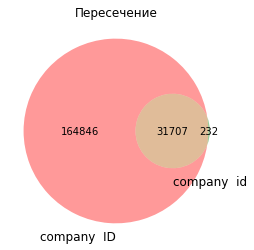

In [7]:
# Загрузим библиотеку для построения диаграммы Венна
!pip install matplotlib-venn
from matplotlib_venn import venn2

# Создадим множества уникальных значений столбцов 'company  ID' и 'company  id' 
first_id = set(candr_df['company  ID'].dropna().unique())
second_id = set(candr_df['company  id'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение")
plt.show() 

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов следует привести к стилю snake case.
- Значения в столбцах `company  ID`, `investment  rounds`, `funding  rounds`, `milestones`, `funding  round  id`, `company id`, `participants` представлены типом `float64`. Следует привести к типу `int64` и оптимизировать размерность данных.
- На графике Венна видно, что значения столбца `company  id` полностью присутствуют в столбце `company ID`.Вероятно, что cтолбец `company  id` в составе другого датасета был присоединен к датасету `company_and_rounds.csv` . Следует переименовать столбец `company  id` для избежания ошибок в анализе. 
- Значения в столбцах `is first round`, `is last round` представлены типом `float64`. Следует привести к типу `bool`.
- Значения в столбцах `founded  at`, `closed  at` и `funded at` содержат информацию о дате и представлены типом `object`. Следует привести к типу `datetime64`.
- Значения в остальных столбцах представлены корректными типами данных.
- Пропуски содержатся во всех столбцах. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [8]:
# Выведем первые строки датафрейма `educ_df` на экран
educ_df.head(15)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


In [9]:
# Выведем информацию о датафрейме `educ_df`
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбцах `id` и `person_id` представлены типом данных `int64`. Размерность этих столбцов можно оптимизировать.
- Cтолбцы `instituition` и `graduated_at`представлены данными в формате `object`. Столбец `graduated_at`, содержащий информацию о дате следует привести к формату `datetime64`.  
- Пропуски содержатся во столбцах `instituition` и `graduated_at`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [10]:
# Выведем первые строки датафрейма `people_df` на экран
people_df.head(15)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


In [11]:
# Выведем информацию о датафрейме `people_df`
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбце `id` представлен типом данных `int64`. Размерность этого столбца можно оптимизировать.
- Значения в столбце `company_id` представлены типом данных `float64`. Следует привести значения столбца к типу `int64` и оптимизировать размерность данных.
- Cтолбцы `first_name`, `last_name` и `network_username` представлены данными в формате `object`, что соответствует представленным данным.  
- Пропуски содержатся во столбцах `first_name`, `last_name`, `company_id` и `network_username`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [12]:
# Выведем первые строки датафрейма `degr_df` на экран
degr_df.head(15)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


In [13]:
# Выведем информацию о датафрейме `degr_df`
degr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбце `id` представлен типом данных `int64`. Размерность этого столбца можно оптимизировать.
- Значения в столбце `object_id` представлены типом данных `object`. Следует исключить из значений подстроку `p:`, привести значения столбца к типу `int64` и оптимизировать размерность данных.
- Cтолбцы `degree_type` и `subject` представлены данными в формате `object`, что соответствует представленным данным.  
- Пропуски содержатся во столбцах `degree_type` и `subject`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [14]:
# Выведем первые строки датафрейма `fund_df` на экран
fund_df.head(15)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1
5,10000,3x5 Special Opportunity Partners,NaN,NaN,NaN,NaN,4,4,0
6,10001,Salem Partners,1997-01-01,salempartners.com,NaN,USA,1,1,0
7,10002,3T Capital,NaN,3tcapital.com,NaN,FRA,3,3,0
8,10003,Merieux Developpement,2009-01-01,merieux-developpement.com,NaN,FRA,2,2,0
9,10004,Aquasourca,NaN,aquasourca.com,NaN,FRA,1,1,0


In [15]:
# Выведем информацию о датафрейме `fund_df`
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет `fund.csv` содержит 9 столбцов и 11652 строк, в которых представлена информация о фондах.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбцы `id`, `investment_rounds`, `invested_companies` и `milestones`  представлены типом данных `int64`. Размерность этих столбцов можно оптимизировать.
- Cтолбец `founded_at`представлен данными в формате `object`. Столбец `founded_at`, содержащий информацию о дате следует привести к формату `datetime64`.
- Cтолбцы `name`, `domain`, `domain` и  `country_code`представлены данными в формате `object`. Соответствует содержимому столбцлв. 
- Пропуски содержатся во столбцах `instituition` и `graduated_at`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [16]:
# Выведем первые строки датафрейма `invest_df` на экран
invest_df.head(15)

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
5,6,4,5,6
6,7,4,5,3181
7,8,5,7299,3
8,9,6,9,6
9,10,7,9,7


In [17]:
# Выведем информацию о датафрейме `invest_df`
invest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет `investment.csv` содержит 4 столбца и 61403 строк, в которых представлена информация о раундах инвестирования.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбцах представлены типом данных `int64`. Размерность этих столбцов можно оптимизировать. 
- Пропуски отсутствуют.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков



#### Обработаем данные в датафрейме acq_df.

In [18]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['id','acquiring_company_id','acquired_company_id']:
    acq_df[column] = pd.to_numeric(acq_df[column], downcast='integer')

In [19]:
# Преобразовываем типы данных к float64 с понижением разрядности 
acq_df['price_amount'] = pd.to_numeric(acq_df['price_amount'], downcast='float')

In [20]:
# Преобразовываем типы данных к datetime64 
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])

In [21]:
# Проверим результат
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   float32       
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float32(1), int16(1), int32(2), object(1)
memory usage: 275.7+ KB


#### Обработаем данные в датафрейме candr_df.

In [22]:
# Переименуем столбец 'company id' в 'company_id_table_2'
candr_df.rename(columns={'company  id': 'company_id_table_2'}, inplace=True)

In [23]:
# Приводим столбцы к стилю snake case
candr_df.columns = candr_df.columns.str.lower().str.replace("  ", "_")
print(candr_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_table_2', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')


In [24]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['company_id', 'company_id_table_2', 'investment_rounds','funding_rounds', 'milestones', 'funding_round_id', 'participants']:
    candr_df[column] = candr_df[column].astype('Int32')

In [25]:
# Понизим разрядность в столбцах с типом данных float64
for column in ['funding_total', 'pre_money_valuation', 'raised_amount']:
    candr_df[column] = pd.to_numeric(candr_df[column], downcast='float')

In [26]:
# Преобразовываем типы данных к bool
for column in ['is_first_round', 'is_last_round']:
    candr_df[column] = candr_df[column].astype(bool)

In [27]:
# Преобразовываем типы данных к datetime64 
for column in ['funded_at', 'founded_at', 'closed_at']:
    candr_df[column] = pd.to_datetime(candr_df[column])

In [28]:
# Проверим результат
candr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int32         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int32         
 10  funding_rounds       217472 non-null  Int32         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int32         
 13  funding_round_

In [29]:
# Установим и импортируем библиотеку missingno 
!pip install missingno
import missingno as msno

<Figure size 720x432 with 0 Axes>

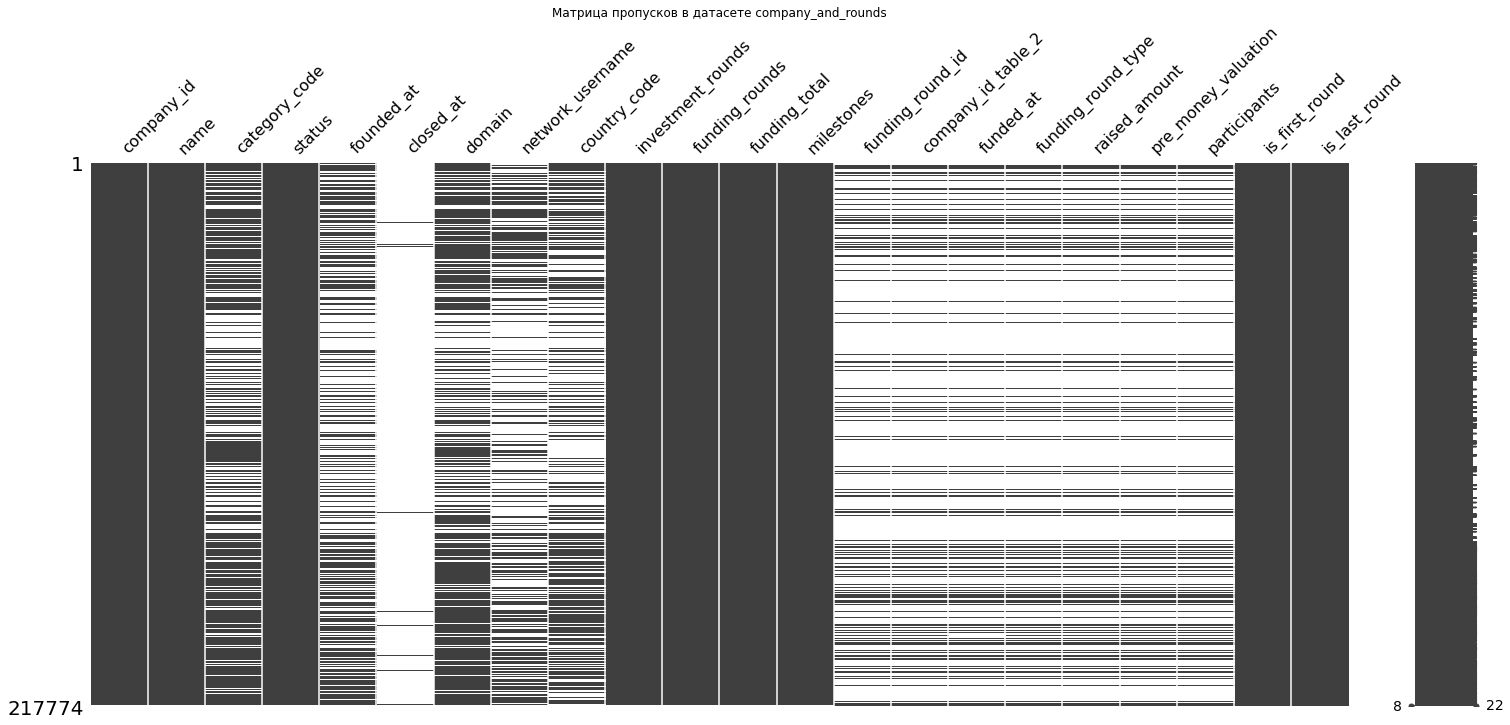

In [30]:
# Построим визуализацию пропусков с помощью матрицы
plt.figure(figsize=(10, 6))
msno.matrix(candr_df)
plt.title('Матрица пропусков в датасете company_and_rounds')
plt.show()

In [31]:
# Создадим таблицы с количеством и долей пропусков
missing = (pd.DataFrame({'Кол-во пропусков': candr_df.isnull().sum(), 'Доля пропусков': candr_df.isnull().sum() / len(candr_df)})
           .style.background_gradient(cmap='coolwarm'))

# Выведем таблицу
display(missing)

,Кол-во пропусков,Доля пропусков
company_id,302,0.001387
name,302,0.001387
category_code,73888,0.339288
status,302,0.001387
founded_at,107818,0.495091
closed_at,214325,0.984162
domain,70615,0.324258
network_username,122240,0.561316
country_code,109167,0.501286
investment_rounds,302,0.001387


На основании матрицы пропусков и таблицы с количеством и долей пропусков можно утверждать, что датасет candr_df был создан путём объединения двух таблиц меньшего размера. На это указывает одинаковое количество пропусков в столбцах funding_round_id, funded_at, funding_round_type, raised_amount, pre_money_valuation и participants.	  

#### Обработаем данные в датафрейме educ_df.

In [32]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['id','person_id']:
    educ_df[column] = pd.to_numeric(educ_df[column], downcast='integer')

In [33]:
# Преобразовываем типы данных к datetime64 
educ_df['graduated_at'] = pd.to_datetime(educ_df['graduated_at'])

In [34]:
# Проверим результат
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB


#### Обработаем данные в датафрейме people_df.

In [35]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['id','company_id']:
    people_df[column] = pd.to_numeric(people_df[column], downcast='integer')

In [36]:
# Проверим результат
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 7.8+ MB


#### Обработаем данные в датафрейме degr_df.

In [37]:
# Исключим подстроку 'p:' из значений столбца 'object_id'
degr_df['object_id'] = degr_df['object_id'].str.replace('p:', '')

In [38]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['id','object_id']:
    degr_df[column] = pd.to_numeric(degr_df[column], downcast='integer')

In [39]:
# Проверим результат
degr_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [40]:
# Проверим результат
degr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  int32 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(2), object(2)
memory usage: 2.5+ MB


#### Обработаем данные в датафрейме fund_df.

In [41]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in ['id', 'investment_rounds', 'invested_companies', 'milestones']:
    fund_df[column] = pd.to_numeric(fund_df[column], downcast='integer')

In [42]:
# Преобразовываем типы данных к datetime64 
fund_df['graduated_at'] = pd.to_datetime(educ_df['graduated_at'])

In [43]:
# Проверим результат
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int16         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   object        
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int16         
 7   invested_companies  11652 non-null  int16         
 8   milestones          11652 non-null  int8          
 9   graduated_at        8422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(3), int8(1), object(5)
memory usage: 626.0+ KB


In [44]:
# Проверим результат
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones,graduated_at
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0,NaT
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0,1990-01-01
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0,1992-01-01
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0,2006-01-01
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1,NaT


#### Обработаем данные в датафрейме invest_df.

In [45]:
# Преобразовываем типы данных к int64 с понижением разрядности
for column in invest_df:
    invest_df[column] = pd.to_numeric(invest_df[column], downcast='integer')

In [46]:
# Проверим результат
invest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int32
 1   funding_round_id  61403 non-null  int32
 2   company_id        61403 non-null  int32
 3   fund_id           61403 non-null  int16
dtypes: int16(1), int32(3)
memory usage: 839.6 KB


#### Предварительный вывод

- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Названия столбцов приведены к стилю snake case, за исключением датасета `company_and_rounds.csv`.

Для датасета `acquisition.csv` провели следующие действия:
- Значения в столбцах `id`, `acquiring_company_id` и `acquired_company_id` представлены типом данных `int64`. Размерность этих столбцов оптимизировали.
- Столбец `price_amount` со стоимости покупок представлен типом данных `int64`.Следует привести к типу `float64`.
- Cтолбцы `term_code` и `acquired_at`представлены данными в формате `object`. Столбец `acquired_at`, содержащий информацию о дате следует привелии к формату `datetime64`.  
- Пропуски содержатся во столбцах `term_code` и `acquired_at`.

Для датасета `company_and_rounds.csv` провели следующие действия:
- Значения в столбцах `company  ID`, `investment  rounds`, `funding  rounds`, `milestones`, `funding  round  id`, `company id`, `participants` представлены типом `float64`. Привели к типу `int64` и оптимизировали размерность данных.
- Столбцы `company ID` и `company  id` дубликаты, содержащие одинаковую информацию. Переименовали столбец `company  id` с наибольшим количеством пропусков. 
- Значения в столбцах `is first round`, `is last round` представлены типом `float64`. Следует привести к типу `bool`.
- Значения в столбцах `founded  at`, `closed  at` и `funded at` содержат информацию о дате и представлены типом `object`. Привели к типу `datetime64`.
- Пропуски содержатся во всех столбцах.

Для датасета `education.csv` провели следующие действия:
- Значения в столбцах `id` и `person_id` представлены типом данных `int64`. Размерность этих столбцов оптимизировали.
- Cтолбцы `instituition` и `graduated_at`представлены данными в формате `object`. Столбец `graduated_at`, содержащий информацию о дате следует привели к формату `datetime64`.  
- Пропуски содержатся во столбцах `instituition` и `graduated_at`. 

Для датасета `people.csv` провели следующие действия:
- Значения в столбце `id` представлен типом данных `int64`. Размерность этого столбца оптимизировали.
- Значения в столбце `company_id` представлены типом данных `float64`. Привели значения столбца к типу `int64` и оптимизировали размерность данных.
- Cтолбцы `first_name`, `last_name` и `network_username` представлены данными в формате `object`, что соответствует представленным данным.  
- Пропуски содержатся во столбцах `first_name`, `last_name`, `company_id` и `network_username`.

Для датасета `degrees.csv` провели следующие действия:
- Значения в столбце `id` представлен типом данных `int64`. Размерность этого столбца оптимизировали.
- Значения в столбце `object_id` представлены типом данных `object`. Исключили из значений подстроку `p:`, привели значения столбца к типу `int64` и оптимизировали размерность данных.
- Cтолбцы `degree_type` и `subject` представлены данными в формате `object`, что соответствует представленным данным.  
- Пропуски содержатся во столбцах `degree_type` и `subject`.

Для датасета `fund.csv` провели следующие действия:
- Значения в столбцы `id`, `investment_rounds`, `invested_companies` и `milestones`  представлены типом данных `int64`. Размерность этих столбцов оптимизировали.
- Cтолбец `founded_at`представлен данными в формате `object`. Столбец `founded_at`, содержащий информацию о дате привели к формату `datetime64`.
- Cтолбцы `name`, `domain`, `domain` и  `country_code`представлены данными в формате `object`. Соответствует содержимому столбцов. 
- Пропуски содержатся во столбцах `instituition` и `graduated_at`. Следует провести более глубокий анализ пропущенных значений в данных столбцах.

Для датасета `investment.csv` провели следующие действия:
- Значения в столбцах представлены типом данных `int64`. Размерность этих столбцов оптимизировали. 
- Пропуски отсутствуют.

В датасетах содержатся пропуски, но общий объем данных позволяет ответить на вопросы заказчика.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [47]:
# Преобразуем дату финансирования в год
candr_df['funded_year'] = candr_df['funded_at'].dt.year.astype('Int64')  

# Сгруппируем данные по годам, определим типичный размер средств, выделяемый в рамках 
# одного раунда финансирования, количество раундов и сбросим индексы
grouped = candr_df.groupby('funded_year').agg({
    'raised_amount': 'median',
    'funding_rounds': 'count'
}).reset_index()

# Зададим названия новым столбцам
grouped.columns = ['funded_year', 'total_raised_amount', 'total_funding_rounds']

# Оставим только те годы, для которых есть информация о более чем 50 раундах финансирования
grouped = grouped[grouped['total_funding_rounds'] > 50]

# Выведем сводную таблицу
print("Сводная таблица по годам:")
display(grouped)

Сводная таблица по годам:


,funded_year,total_raised_amount,total_funding_rounds
15,1999,2000000.0,76
16,2000,4200000.0,125
17,2001,3000000.0,95
18,2002,4200000.0,115
19,2003,3000000.0,154
20,2004,5000000.0,286
21,2005,5500000.0,1624
22,2006,5000000.0,2409
23,2007,3973320.0,3220
24,2008,3110000.0,3735


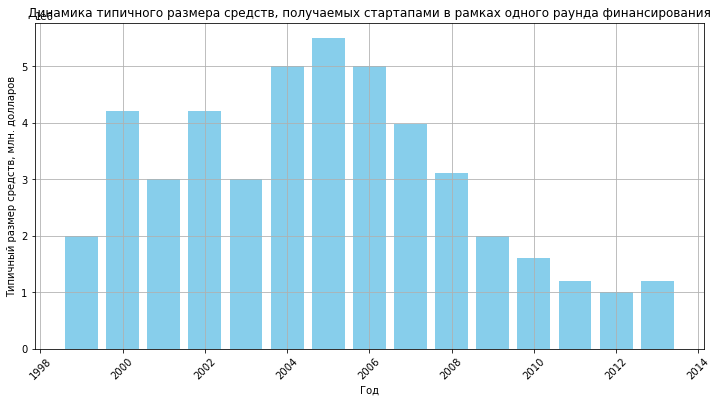

In [48]:
# Построим гистограмму
plt.figure(figsize=(12, 6))
plt.bar(grouped['funded_year'], grouped['total_raised_amount'], color='skyblue')
plt.title('Динамика типичного размера средств, получаемых стартапами в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств, млн. долларов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Типичный размер собранных в рамках одного раунда средств был максимален в 2002 году.

В 2013 году наблюдалось увеличение количества раундов и выделяемых в рамках каждого раунда средств по сравнению с 2012 годом.


### 2.2. Люди и их образование


In [49]:
# Объединеним датасеты people_df и educ_df  
merged_df = pd.merge(people_df, educ_df, left_on='id', right_on='person_id', how='left', suffixes=('_people', '_education'))

# Исключим дубликаты по id_people
merged_df = merged_df.drop_duplicates(subset=['id_people'])

# Подсчитаем количество сотрудников в разрезе каждой компании и сбросим индексы
company_grouped = merged_df.groupby('company_id')['id_people'].count().reset_index()

# Зададим название столбцам
company_grouped.columns = ['company_id', 'count_employ']

In [50]:
# Загрузим библиотеку seaborn для построения графика распределения сотрудников
import seaborn as sns

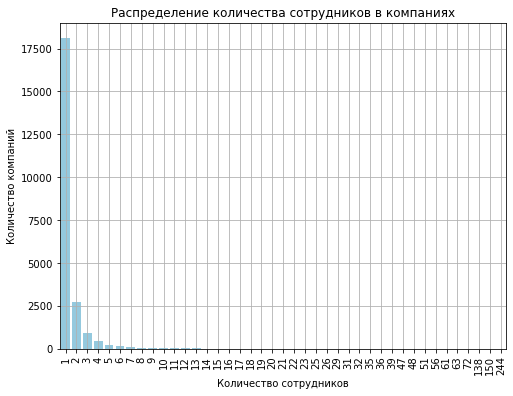

In [51]:
# Построим график с распределением количества сотрудников в компаниях
plt.figure(figsize=(8, 6))
sns.countplot(data=company_grouped, x='count_employ', color='skyblue')
plt.title('Распределение количества сотрудников в компаниях')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Как видно на графике, большинство компаний состоит из одного сотрудника. Установим границы групп согласно графика распределния сотрудников в компаниях.

In [52]:
# Устанавливаем границы групп в зависимости от количества сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
company_grouped['size_group'] = pd.cut(company_grouped['count_employ'], bins=bins, labels=labels)

# Добавление size_group к основному датафрейму
merged_df = pd.merge(merged_df, company_grouped[['company_id', 'size_group']], on='company_id', how='left')

# Подсчитаем количество сотрудников в разрезе групп по численности и сбросим индексы
all_employ = merged_df.groupby('size_group')['id_people'].count().reset_index()

# Зададим название столбцам
all_employ.columns = ['size_group', 'sum_employ_by_group']

# Подсчитаем количество сотрудников без информации об образовании в разрезе групп по численности и сбросим индексы
employ_no_educ = merged_df[merged_df['instituition'].isna()].groupby('size_group')['id_people'].count().reset_index()

# Зададим название столбцам
employ_no_educ.columns = ['size_group', 'employ_no_educ']

In [53]:
# Объединим датасеты
educ_info = pd.merge(all_employ, employ_no_educ, on='size_group', how='left')

# Расчитаем долю сотрудников без информации об образовании
educ_info['no_educ_info'] = educ_info['employ_no_educ'] / educ_info['sum_employ_by_group']

# Выведем результат
("Средняя доля сотрудников без информации об образовании в каждой из групп:")
print(educ_info[['size_group', 'no_educ_info']])

  size_group  no_educ_info
0          1      0.463127
1          2      0.466962
2          3      0.487875
3        4-5      0.499832
4       6-10      0.533784
5      11-25      0.456842
6        26+      0.272727


Согласно таблицы максимальная доля сотрудников без информации об образовании обнаружена в компаниях численностью от 6 до 10 человек (53,3%), а минимальное количество 27,2% в компаниях с численностью от 26 человек. Заметно, что размер компании влияет на требования к сотрудникам (информация об образовании сотрудников). Границы групп определялись согласно графика распределения количества сотрудников по компаниях.
Для выполениния задания возможно присоединение датасета degrees.csv по полю 'id'-идентификатор записи об образовании. Но так количество записей в датасете education.csv соответствует количеству записей в датасете degrees.csv, объединение таблиц не рационально т.к. на результат выполнения задания это не влияет.  

### 2.3. Объединять или не объединять — вот в чём вопрос

In [54]:
# Объединим все значения network_username из различных датафреймов в один словарь и исключим пропуски
all_usernames = {
    'people_df': set(people_df['network_username'].dropna()),
    'candr_df': set(candr_df['network_username'].dropna()),
    'fund_df': set(fund_df['network_username'].dropna())
}

# Посчитаем количество уникальных значений в каждом множестве и выведем результат
print(f"Количество уникальных значений в people_df: {len(all_usernames['people_df'])}")
print(f"Количество уникальных значений в candr_df: {len(all_usernames['candr_df'])}")
print(f"Количество уникальных значений в fund_df: {len(all_usernames['fund_df'])}")

Количество уникальных значений в people_df: 38421
Количество уникальных значений в candr_df: 79571
Количество уникальных значений в fund_df: 2098


In [55]:
# Найдём пересечения значений множеств 
int_people_candr = all_usernames['people_df'].intersection(all_usernames['candr_df'])
int_people_fund = all_usernames['people_df'].intersection(all_usernames['fund_df'])
int_candr_fund = all_usernames['candr_df'].intersection(all_usernames['fund_df'])

# Посчитаем количество пересекающихся значений между множествами и выведем результат
print(f"\nКоличество пересекающихся значений между people_df и candr_df: {len(int_people_candr)}")
print(f"Количество пересекающихся значений между people_df и fund_df: {len(int_people_fund)}")
print(f"Количество пересекающихся значений между candr_df и fund_df: {len(int_candr_fund)}")


Количество пересекающихся значений между people_df и candr_df: 2199
Количество пересекающихся значений между people_df и fund_df: 79
Количество пересекающихся значений между candr_df и fund_df: 70


Пересечения значений между датасетами присутствуют (между people_df и candr_df - 2199 шт, между people_df и fund_df - 79 шт, candr_df и fund_df - 70 шт), но в значительно меньшем количестве по сравнению с количество уникальных значений столбца 'network_username'. При этом различается количество уникальных значений в датасетах (people_df - 38421 шт, candr_df - 79571 шт , fund_df - 2098 шт). Следовательно использование столбца 'network_username' для объединения данных нельзя использовать т.к. это приведет к большой потере данных. 


### 2.4. Проблемный датасет и причина возникновения пропусков

In [56]:
# Выведем первые строки дамтасета 'company_and_rounds.csv'
print(candr_df.head(15))

    company_id                           name    category_code     status  \
0            1                       Wetpaint              web  operating   
1            1                       Wetpaint              web  operating   
2            1                       Wetpaint              web  operating   
3           10                        Flektor      games_video   acquired   
4          100                          There      games_video   acquired   
5        10000                        MYWEBBO  network_hosting  operating   
6        10001             THE Movie Streamer      games_video  operating   
7        10002                 Synergie Media      advertising  operating   
8        10003         Green Basti Ecosystems        cleantech  operating   
9       100042                       HostNine              NaN  operating   
10       10005              Thomas Publishing      advertising  operating   
11      100062  Vetter Idea Management System       enterprise  operating   

In [57]:
# Выведем информацию о дамтасете 'company_and_rounds.csv'
print(candr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int32         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int32         
 10  funding_rounds       217472 non-null  Int32         
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  Int32         
 13  funding_round_

Разделим датасет candr_df на 2 датасета. В первый добавим информацию о компаниях, во второй - информацией о раундах финансирования.

In [58]:
# Создадим список столбцов для таблицы с информацией о компании
company_info= [
    'company_id', 'name', 'domain', 'network_username', 'country_code',
    'category_code', 'founded_at', 'closed_at', 'status', 'investment_rounds', 'funding_rounds', 'funding_total',
    'milestones']
# Исключим дубликаты и сбросим индексы
company_info_df = candr_df[company_info].drop_duplicates().reset_index()

In [59]:
# Исключим столбец index из датасета
company_info_df = company_info_df.drop(columns=['index'])

In [60]:
# Выведем первые строки датасета company_info_df
display(company_info_df.head(15))
# Проверим информацию о дамтасете company_info_df
print(company_info_df.info())

,company_id,name,domain,network_username,country_code,category_code,founded_at,closed_at,status,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,wetpaint-inc.com,BachelrWetpaint,USA,web,2005-10-17,NaT,operating,0,3,39750000.0,5
1,10,Flektor,flektor.com,NaN,USA,games_video,NaT,NaT,acquired,0,0,0.0,0
2,100,There,there.com,NaN,USA,games_video,NaT,NaT,acquired,0,0,0.0,4
3,10000,MYWEBBO,mywebbo.com,NaN,NaN,network_hosting,2008-07-26,NaT,operating,0,0,0.0,0
4,10001,THE Movie Streamer,themoviestreamer.com,NaN,NaN,games_video,2008-07-26,NaT,operating,0,0,0.0,0
5,10002,Synergie Media,synergie-media.com,NaN,MAR,advertising,2007-06-27,NaT,operating,0,0,0.0,0
6,10003,Green Basti Ecosystems,NaN,NaN,IND,cleantech,2008-08-20,NaT,operating,0,0,0.0,0
7,100042,HostNine,hostnine.com,Hostnine,NaN,NaN,NaT,NaT,operating,0,0,0.0,1
8,10005,Thomas Publishing,thomaspublishing.com,NaN,USA,advertising,NaT,NaT,operating,0,0,0.0,1
9,100062,Vetter Idea Management System,getvetter.com,getvetter,NaN,enterprise,2011-08-01,NaT,operating,0,0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int32         
 1   name               196553 non-null  object        
 2   domain             126545 non-null  object        
 3   network_username   80591 non-null   object        
 4   country_code       87990 non-null   object        
 5   category_code      123186 non-null  object        
 6   founded_at         91227 non-null   datetime64[ns]
 7   closed_at          2620 non-null    datetime64[ns]
 8   status             196553 non-null  object        
 9   investment_rounds  196553 non-null  Int32         
 10  funding_rounds     196553 non-null  Int32         
 11  funding_total      196553 non-null  float32       
 12  milestones         196553 non-null  Int32         
dtypes: Int32(4), datetime64[ns](2), float32(1), 

In [61]:
# Создадим список столбцов для таблицы с информацией о раундах финансирования
funding_info = [
    'funding_round_id', 'company_id_table_2', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants',
    'funded_year', 'is_first_round', 'is_last_round']

# Исключим дубликаты и сбросим индексы
funding_info_df = candr_df[funding_info].drop_duplicates().reset_index()

In [62]:
# Исключим столбец index из датасета
funding_info_df = funding_info_df.drop(columns=['index'])

In [63]:
# Выведем первые строки датасета funding_info_d
display(funding_info_df.head(15))
# Проверим информацию о дамтасете funding_info_d
print(funding_info_df.info())

,funding_round_id,company_id_table_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,funded_year,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000.0,0.0,2,2005,False,True
1,889,1,2007-01-01,series-b,9500000.0,0.0,3,2007,False,False
2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,2008,True,False
3,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,True,True
4,1644,1001,2008-02-26,series-a,5000000.0,0.0,3,2008,True,True
5,6682,10014,2008-09-01,angel,0.0,0.0,1,2008,True,True
6,3619,10015,2008-10-10,series-a,2000000.0,0.0,2,2008,False,True
7,18213,10015,2010-09-10,series-b,9000000.0,0.0,4,2010,False,False
8,27747,10015,2012-01-24,series-c+,12000000.0,0.0,4,2012,False,False
9,45409,10015,2013-08-13,series-c+,43000000.0,0.0,5,2013,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52929 entries, 0 to 52928
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int32         
 1   company_id_table_2   52928 non-null  Int32         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float32       
 5   pre_money_valuation  52928 non-null  float32       
 6   participants         52928 non-null  Int32         
 7   funded_year          52680 non-null  Int64         
 8   is_first_round       52929 non-null  bool          
 9   is_last_round        52929 non-null  bool          
dtypes: Int32(3), Int64(1), bool(2), datetime64[ns](1), float32(2), object(1)
memory usage: 2.5+ MB
None



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объединиv данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмём данные из датасета `company_info_df` — выберим только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

In [64]:
# Отфильтруем данные датасета company_info_df на основе условий и сбросим индексы
company_info_df = company_info_df[(company_info_df['funding_rounds'] > 0) | 
                                  (company_info_df['investment_rounds'] > 0) |
                                  (company_info_df['status'] == 'acquired')].reset_index()
# Исключим столбец index из датасета
company_info_df = company_info_df.drop(columns=['index'])
# Проверим результат фильтрации
display(company_info_df.head(10))

,company_id,name,domain,network_username,country_code,category_code,founded_at,closed_at,status,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,wetpaint-inc.com,BachelrWetpaint,USA,web,2005-10-17,NaT,operating,0,3,39750000.0,5
1,10,Flektor,flektor.com,NaN,USA,games_video,NaT,NaT,acquired,0,0,0.0,0
2,100,There,there.com,NaN,USA,games_video,NaT,NaT,acquired,0,0,0.0,4
3,1001,FriendFeed,friendfeed.com,friendfeed,USA,web,2007-10-01,NaT,acquired,0,1,5000000.0,3
4,10014,Mobclix,mobclix.com,mobclix,USA,mobile,2008-03-01,NaT,acquired,0,1,0.0,4
5,10015,Fitbit,fitbit.com,fitbit,USA,health,2007-10-01,NaT,operating,0,5,68069200.0,0
6,100155,MTPV,mtpv.com,NaN,USA,cleantech,2003-01-01,NaT,operating,0,3,10125300.0,1
7,10018,Demandbase,demandbase.com,Demandbase,USA,analytics,2006-01-01,NaT,operating,0,3,33000000.0,3
8,100189,Locatrix Communications,locatrix.com,NaN,AUS,mobile,2003-11-01,NaT,operating,0,1,250000.0,1
9,10020,Threebrix E-services Pvt Ltd,NaN,NaN,NaN,NaN,NaT,NaT,operating,1,0,0.0,0


In [65]:
# Выведем информацию о датасете
company_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int32         
 1   name               40747 non-null  object        
 2   domain             35754 non-null  object        
 3   network_username   20850 non-null  object        
 4   country_code       34742 non-null  object        
 5   category_code      35315 non-null  object        
 6   founded_at         27807 non-null  datetime64[ns]
 7   closed_at          2128 non-null   datetime64[ns]
 8   status             40747 non-null  object        
 9   investment_rounds  40747 non-null  Int32         
 10  funding_rounds     40747 non-null  Int32         
 11  funding_total      40747 non-null  float32       
 12  milestones         40747 non-null  Int32         
dtypes: Int32(4), datetime64[ns](2), float32(1), object(6)
memory 

Датасет `company_info_df` содержит 13 столбцов и 40747 строк.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к стилю snake case.
- Значения в столбцах приведены к соответствующим типам и оптимизированны. 
- Пропуски содержатся во столбцах `domain`, `network_username`, `country_code`, `category_code`, `founded_at` и `closed_at`.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [66]:
# Преобразуем значения столбца 'funding_total' в миллионы долларов
company_info_df['funding_total'] = company_info_df['funding_total'] / 1e6

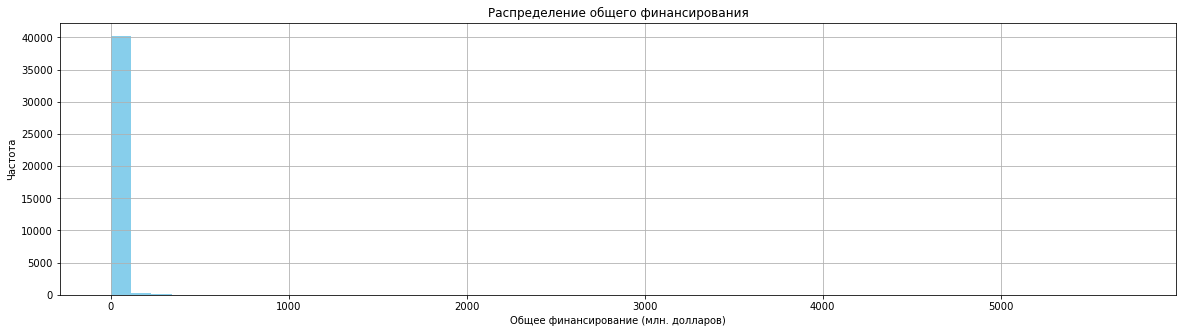

In [67]:
# Построим гистограмму для распределения общего размера финансирования
plt.figure(figsize=(20, 5))
plt.hist(company_info_df['funding_total'], bins=50, color='skyblue')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

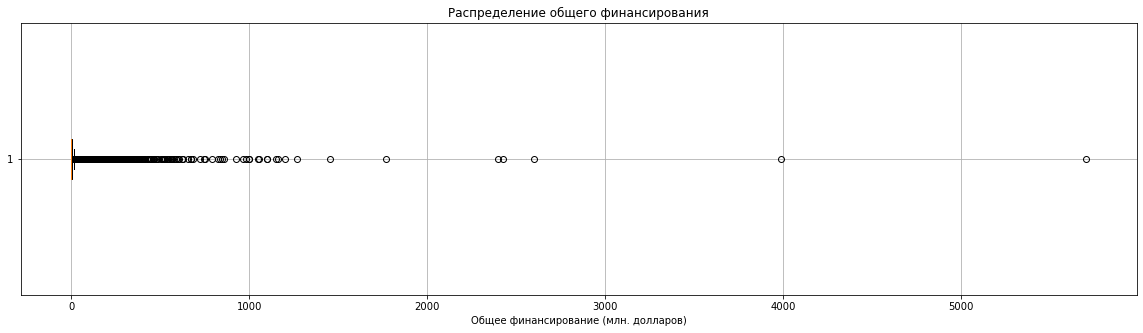

In [68]:
# Построим диаграмму размахов для определения выбросов общего размера финансирования
plt.figure(figsize=(20, 5))
plt.boxplot(company_info_df['funding_total'], vert=False)
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.grid(True)
plt.show()

Судя по графикам типичный размер общего финансирования для одной компании составляет примерно 1 млн. долларов, выбивающимся являются значения примерно выше 1 400 млн. долларов. Графически точно определить типичные и выбивающиеся значения не представляется возможным из-за большого разброса данных и наличия выбросов. 

In [69]:
# Выведем информацию о числовых данных столбца 'funding_total'
company_info_df['funding_total'].describe()

count    40747.000000
mean        10.135546
std         56.467602
min          0.000000
25%          0.000000
50%          0.600000
75%          5.650650
max       5699.999512
Name: funding_total, dtype: float64

Интересующие нас показатели, определенные методом describe(), имеют следующие значения:
    
- Среднее значение - 10,135 млн. долларов,
- Стандартное отклонение - 56,464 млн.долларов,
- 25-персентиль - 0,00 долларов,
- Медианное значение - 0,6 млн. долларов.
- Максимальное значение - 5 699,99 млн. долларов.
Среднее и медианное значение значительно различаются между собой, что говорит о большом количестве выбросов. О наличии выбросов также говорит высокое стандартное отклонение. Также заметно, что 25% компаний имеют 0 размер общего финансирования, что влияет на распреление данных. В связи с этим использовать обычные способы нахождения типичных значений для данного случая является нерациональным.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [70]:
# Объединим датасеты company_info_df и acq_df
sold_сompanies = pd.merge(company_info_df, acq_df, left_on='company_id', right_on='acquired_company_id', how='inner')

# Оставим компании, проданные за ноль или один доллар с ненулевым общим объемом финансирования и сбросим индексы
sold_сompanies = sold_сompanies[(sold_сompanies['funding_total'] > 0) & 
                               ((sold_сompanies['price_amount'] == 0) | 
                                (sold_сompanies['price_amount'] == 1))].reset_index()
# Проверим результат
display(sold_сompanies[['company_id', 'name', 'funding_total', 'price_amount']])

,company_id,name,funding_total,price_amount
0,10054,Jumptap,121.500000,0.0
1,101312,SideTour,4.000000,0.0
2,101340,ChoicePass,0.250000,0.0
3,10137,Producteev,1.310000,0.0
4,10139,TradeCard,44.924999,0.0
...,...,...,...,...
1613,99,Amie Street,3.900000,0.0
1614,9905,UBmatrix,5.172350,0.0
1615,992,wunderloop,10.000000,0.0
1616,997,Zimbra,14.500000,0.0


Покупка компании за ноль или за один доллар в данном случае означает, что объём финансирования является суммой покупки компании. 

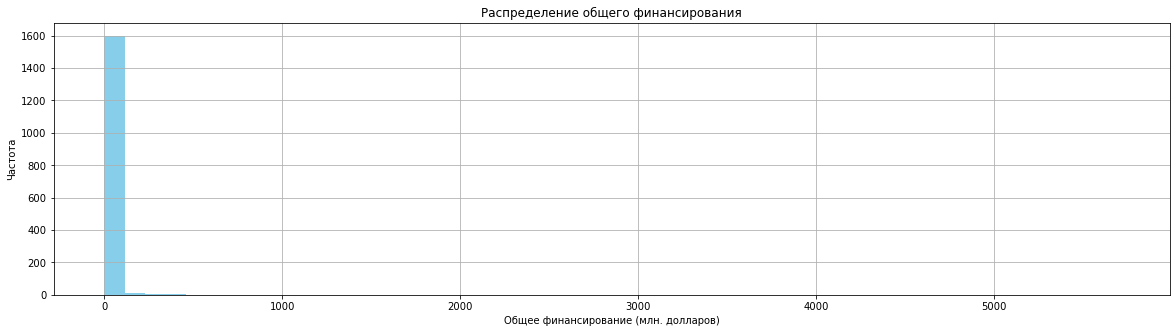

In [71]:
# Построим гистограмму для распределения общего размера финансирования
plt.figure(figsize=(20, 5))
plt.hist(sold_сompanies['funding_total'], bins=50, color='skyblue')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

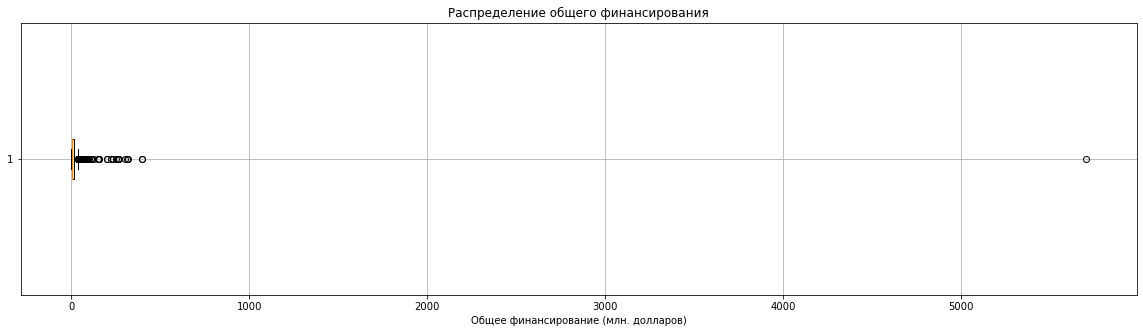

In [72]:
# Построим диаграмму размахов для определения выбросов общего размера финансирования
plt.figure(figsize=(20, 5))
plt.boxplot(sold_сompanies['funding_total'], vert=False)
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.grid(True)
plt.show()

In [73]:
# Исключим аномальное значение выше 5 млд. долларов
filtered_sold_сompanies = sold_сompanies[sold_сompanies['funding_total'] < 5e3]

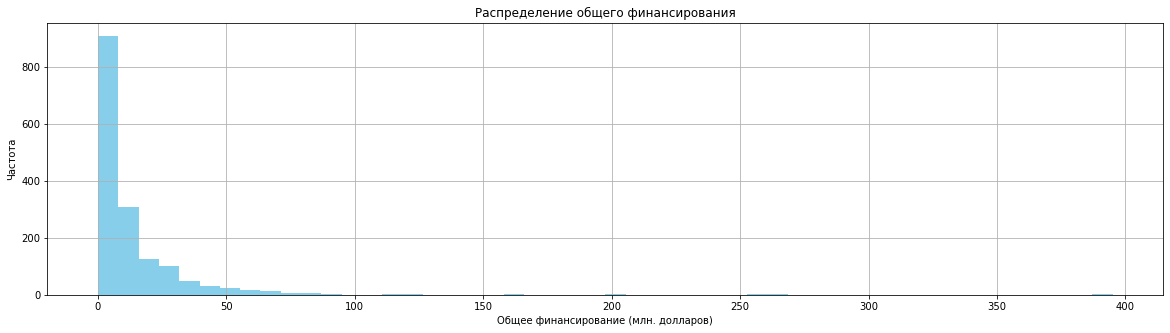

In [74]:
# Построим гистограмму для распределения общего размера финансирования
plt.figure(figsize=(20, 5))
plt.hist(filtered_sold_сompanies['funding_total'], bins=50, color='skyblue')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

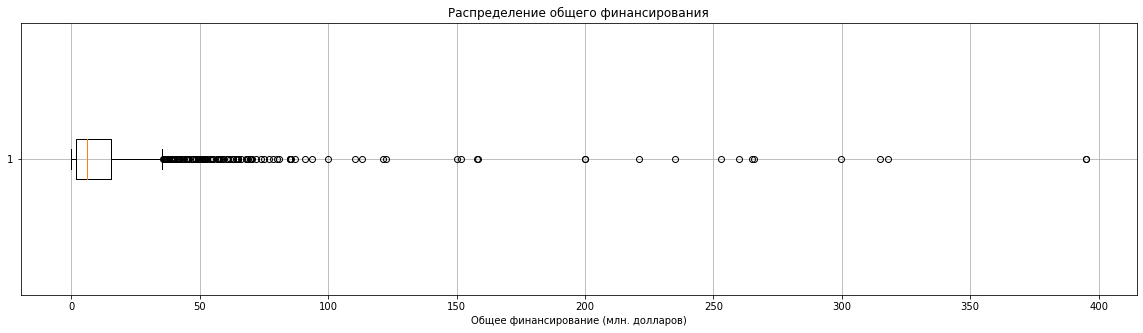

In [75]:
# Построим диаграмму размахов для определения выбросов общего размера финансирования
plt.figure(figsize=(20, 5))
plt.boxplot(filtered_sold_сompanies['funding_total'], vert=False)
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование (млн. долларов)')
plt.grid(True)
plt.show()

In [76]:
# Расчитаем межквартильный размах
q1 = filtered_sold_сompanies['funding_total'].quantile(0.25)
q3 = filtered_sold_сompanies['funding_total'].quantile(0.75)
iqr = q3 - q1

# Определим верхнюю и нижнюю границу выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: -18.25
Верхняя граница выбросов: 35.75


In [77]:
# Отсортируем данные в порядке возрастания 
total_funding_sort = filtered_sold_сompanies['funding_total'].sort_values()

# Напишем функцию для определения процентиля по значению выброса
def find_percent(data, value):
    n = len(data)
    for i, v in enumerate(data):
        if v >= value:
            percentile = (i / n) * 100
            break
    else:
        percentile = 100
    return percentile

# Вычислим процентили
lower_percent = find_percent(total_funding_sort, lower_bound)
upper_percent = find_percent(total_funding_sort, upper_bound)

print(f"Нижняя граница выбросов соответствует {lower_percent:.2f}-му процентилю")
print(f"Верхняя граница выбросов соответствует {upper_percent:.2f}-му процентилю")

Нижняя граница выбросов соответствует 0.00-му процентилю
Верхняя граница выбросов соответствует 90.97-му процентилю


In [78]:
# Выведем информацию о числовых данных столбца 'funding_total'
filtered_sold_сompanies['funding_total'].describe()

count    1617.000000
mean       14.639139
std        30.072405
min         0.003750
25%         2.000000
50%         6.000000
75%        15.500000
max       395.000000
Name: funding_total, dtype: float64

In [79]:
# Определим 99-ый процентиль для данных столбца 'funding_total'
filtered_sold_сompanies['funding_total'].quantile(0.99)

145.59999999999775

Показатели размера финансирования для компаний, купленных за 0 и 1 доллар:
- Среднее значение - 14,64 млн. долларов,
- Стандартное отклонение - 30,07 млн.долларов,
- 25-персентиль - 2.00 млн.долларов,
- Медианное значение - 6,0 млн. долларов.
- Максимальное значение - 395,00 млн. долларов.

Среднее и медианное значение различаются между собой, что говорит о выбросах. Верхняя граница выбросов составляет 35.75 млн. долларов, что соответствует 91-му процентилю. О наличии выбросов также говорит высокое стандартное отклонение. Заменить нижнюю и верхнюю границу выбросов на значения, рассчитанные по процентилям не рекомендуется так как 9% данных в этом случае будут потеряны. В данном случае, рекомендуется использовать 99-ый процентиль, что сохранит нам 99% процентов данных и исключит только значения выше 145.59 млн. долларов. 


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [80]:
# Объединим датасеты company_info_df и acq_df
acquired_companies = pd.merge(company_info_df, acq_df, left_on='company_id', right_on='acquired_company_id', how='inner')

# Переведем значения в столбцах funding_total и price_amount в миллионы долларов
for column in ['funding_total', 'price_amount']:
    acquired_companies[column] = acquired_companies[column] / 1e6

In [81]:
# Определим 1% и 99% квантилей для price_amount
low = acquired_companies['price_amount'].quantile(0.01)
high = acquired_companies['price_amount'].quantile(0.99)

# Исключим выбросы
acquired_companies = acquired_companies[(acquired_companies['price_amount'] > low) & 
                                                 (acquired_companies['price_amount'] < high)]

# Сгруппируем данные по категориям стартапов и рассчитаем медиану и стандартное отклонение 
category_stats = acquired_companies.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()

# Исключим категории с количеством покупок компаний меньше 10
category_stats_filtered = category_stats[category_stats['count'] > 10]

In [82]:
# Выделим категории с наибольшими ценами
top_categories_by_median = category_stats_filtered.sort_values(by='median', ascending=False).head(10)[['category_code', 'median', 'count']]

# Проверим результат
print("Топ-10 категорий стартапов с наибольшими ценами:")
display(top_categories_by_median)

Топ-10 категорий стартапов с наибольшими ценами:


,category_code,median,count
16,manufacturing,343.000000,19
4,cleantech,170.000000,37
10,finance,170.000000,19
6,ecommerce,157.500000,50
29,security,155.000000,34
3,biotech,155.000000,244
22,network_hosting,99.500000,62
28,search,90.000000,19
30,semiconductor,80.010002,67
24,other,67.000000,82


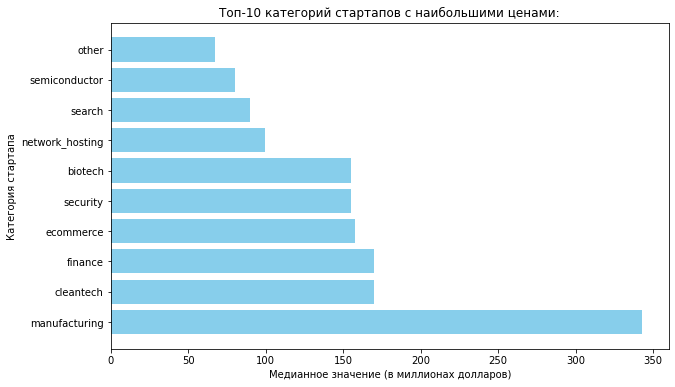

In [83]:
# Построим диаграмму распределения
plt.figure(figsize=(10, 6))
plt.barh(top_categories_by_median['category_code'], top_categories_by_median['median'], color='skyblue')
plt.xlabel('Медианное значение (в миллионах долларов)')
plt.ylabel('Категория стартапа')
plt.title('Топ-10 категорий стартапов с наибольшими ценами:')
plt.show()

In [84]:
# Выделим категории с наибольшим разбросом цен
top_categories_by_difference = category_stats_filtered.sort_values(by='std', ascending=False).head(10)[['category_code', 'std', 'count']]

# Проверим результат
print("\nТоп-10 категорий стартапов с наибольшим разбросом цен:")
display(top_categories_by_difference)


Топ-10 категорий стартапов с наибольшим разбросом цен:


,category_code,std,count
16,manufacturing,645.447519,19
10,finance,572.486526,19
4,cleantech,527.661792,37
22,network_hosting,501.445168,62
8,enterprise,478.301529,109
24,other,448.099458,82
29,security,416.578506,34
0,advertising,385.913246,83
32,software,384.116004,387
3,biotech,378.883833,244


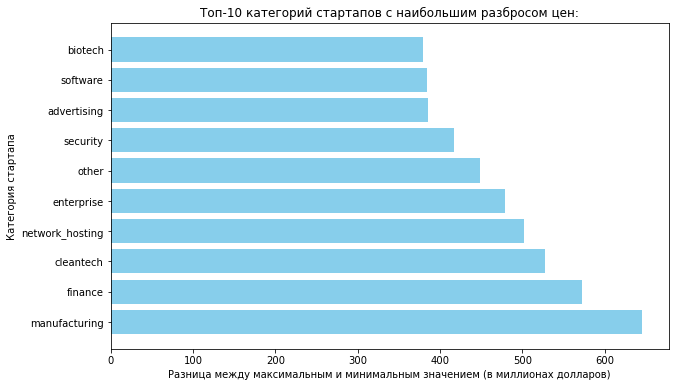

In [85]:
# Построим диаграмму распределения
plt.figure(figsize=(10, 6))
plt.barh(top_categories_by_difference['category_code'], top_categories_by_difference['std'], color='skyblue')
plt.xlabel('Разница между максимальным и минимальным значением (в миллионах долларов)')
plt.ylabel('Категория стартапа')
plt.title('Топ-10 категорий стартапов с наибольшим разбросом цен:')
plt.show()

Цену стартапов определяли по столбцу price_amount с суммой сделки. Для этих значений расчитали медианное значение, которое покажет цену в категории и среднее отклонение, которое укажет на разброс цены стартапа в категории.

Топ-10 категорий стартапов с наибольшими ценами:
- 1. manufacturing -  343.00 млн.долларов (19 кол-во сделок)
- 2. cleantech -      170.00	млн.долларов (37 кол-во сделок)
- 3. finance - 	      170.00	млн.долларов (19 кол-во сделок)
- 4. ecommerce - 	  157.50	млн.долларов	(50 кол-во сделок)
- 5. security -	      155.00	млн.долларов0	(34 кол-во сделок)
- 6. biotech	-     155.00	млн.долларов0	(244 кол-во сделок)
- 7. network_hosting- 99.50	млн.долларов	(62 кол-во сделок)
- 8. search	  -       90.00	млн.долларов	(19 кол-во сделок)
- 9. semiconductor -  80.01	млн.долларов	(67 кол-во сделок)
- 10. other	-         67.00	млн.долларов	(82 кол-во сделок)



Топ-10 категорий стартапов с наибольшим разбросом цен:
- 1. manufacturing	-  645.44 млн.долларов (19 кол-во сделок)
- 2. finance	-      572.486526 млн.долларов (19 кол-во сделок)
- 3. cleantech - 	   527.66 млн.долларов (37 кол-во сделок)
- 4. network_hosting - 501.44 млн.долларов (62 кол-во сделок)
- 5. enterprise -      478.30 млн.долларов (109 кол-во сделок)
- 6. other -           448.09 млн.долларов (82 кол-во сделок)
- 7. security -        416.57 млн.долларов (34 кол-во сделок)
- 8. advertising	-  385.91 млн.долларов (83 кол-во сделок)
- 9. software -        384.11 млн.долларов (387 кол-во сделок)
- 10. biotech	-      378.88 млн.долларов (244 кол-во сделок)


Данные категории стоит рассматривать крупным инвесторам, которые готовы к высоким рискам ради потенциально больших доходов.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [86]:
# Сгруппируема данные по статусу и расчитаем средние значения funding_rounds
status_rounds = company_info_df.groupby('status')['funding_rounds'].mean().reset_index()

# Выведем результат
print(status_rounds)

      status  funding_rounds
0   acquired        0.523526
1     closed        1.381453
2        ipo        1.934375
3  operating        1.522658


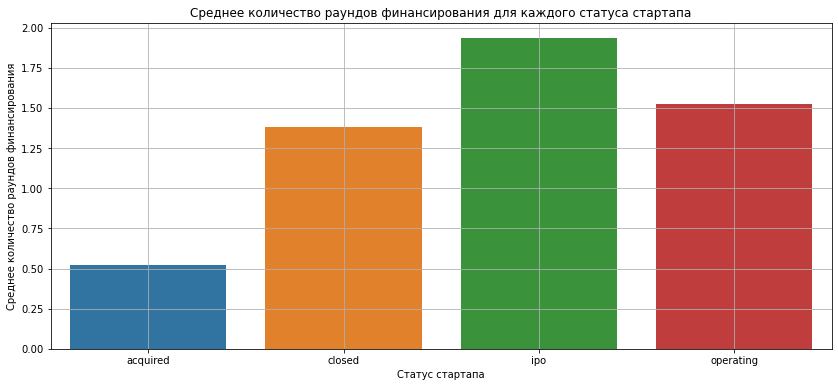

In [87]:
# Пострим график среднего количества раундов финансирования для каждого статуса
plt.figure(figsize=(14, 6))
sns.barplot(x='status', y='funding_rounds', data=status_rounds)
plt.title('Среднее количество раундов финансирования для каждого статуса стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.grid(True)
plt.show()


Как видно на графике, для статуса стартапа acquired ("приобретенный") характерно 0.52 раунда финансирования, для статуса closed ("закрытый")  - 1.38 раунда финансирования, для статуса ipo ("первичное публичное предложение") - 1.93 раунда финансирования,
для статуса operating ("действующий") - 1.52 раунда финансирования. Для того, чтобы приобрести компанию требуется меньше всего раундов финансирования, а больше всего раундов, чтобы вывести компанию на ipo. Примерно одинаковое количество раундов потребуется, чтобы компания самостоятельно продолжала работу либо же закрылась.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе выполнения проекта были исследованы 7 датасетов, содержащих следующую информацию:
- `acquisition.csv` — информация о покупках одними компаниями других компаний;
- `company_and_rounds.csv` — информация о компаниях и раундах финансирования;
- `education.csv` — информация о об образовании сотрудника;
- `people.csv` — информация о сотрудниках;
- `degrees.csv` — информация о типе образования сотрудника;
- `fund.csv` — информация о фондах;
- `investment.csv` — информация о раундах инвестирования.
Была проведенена преобработка данных:
- Значения были приведены к соответствующим типам данных, оптимизирована их размерность.
- Проведены проверки на явные и неявные дубликаты.
В ходе исследования раундов инвестирования определили, что размер собранных в рамках одного раунда средств был максимален в 2002 году, а рынок инвестиций находится на подъеме за счёт увеличения количества проинвестированных стартапов. 

При анализе сотрудников и их образования определено, что большинство компаний состоит из одного сотрудника. Обнаружили максимальную долю сотрудников без информации об образовании в компаниях численностью от 6 до 10 человек (53,3%), и минимальное количество 27,2% в компаниях с численностью от 26 человек. Заметили, что размер компании влияет на требования к сотрудникам (информация об образовании сотрудников).   

В ходе проведения анализа исключили возможность для объединения данных при помощи столбцов 'network_username'.

Разделили датасет candr_df на 2 датасета. В первый (company_info_df) добавили информацию о компаниях, во второй (funding_info_df) - информацию о раундах финансирования. Далее отфильтровали данные в датасете company_info_df для ответа на вопросы заказчика, которые касаются интересующих его компаний.

Определили, что в итоговом датасете присутствуют выбросы и аномальные значения. Определили для компаний, купленных за 0 и 1 доллар, показатели размера финансирования:
- Среднее значение - 14,64 млн. долларов,
- Стандартное отклонение - 30,07 млн.долларов,
- Медианное значение - 6,0 млн. долларов.
- Максимальное значение - 395,00 млн. долларов.
Определили, что покупка компании за ноль или за один доллар в данном случае означает, что объём финансирования является суммой покупки компании.

Топ-10 категорий стартапов с наибольшими ценами:
- 1. manufacturing -  343.00 млн.долларов (19 кол-во сделок)
- 2. cleantech -      170.00	млн.долларов (37 кол-во сделок)
- 3. finance - 	      170.00	млн.долларов (19 кол-во сделок)
- 4. ecommerce - 	  157.50	млн.долларов	(50 кол-во сделок)
- 5. security -	      155.00	млн.долларов0	(34 кол-во сделок)
- 6. biotech	-     155.00	млн.долларов0	(244 кол-во сделок)
- 7. network_hosting- 99.50	млн.долларов	(62 кол-во сделок)
- 8. search	  -       90.00	млн.долларов	(19 кол-во сделок)
- 9. semiconductor -  80.01	млн.долларов	(67 кол-во сделок)
- 10. other	-         67.00	млн.долларов	(82 кол-во сделок)

Топ-10 категорий стартапов с наибольшим разбросом цен:
- 1. manufacturing	-  645.44 млн.долларов (19 кол-во сделок)
- 2. finance	-      572.486526 млн.долларов (19 кол-во сделок)
- 3. cleantech - 	   527.66 млн.долларов (37 кол-во сделок)
- 4. network_hosting - 501.44 млн.долларов (62 кол-во сделок)
- 5. enterprise -      478.30 млн.долларов (109 кол-во сделок)
- 6. other -           448.09 млн.долларов (82 кол-во сделок)
- 7. security -        416.57 млн.долларов (34 кол-во сделок)
- 8. advertising	-  385.91 млн.долларов (83 кол-во сделок)
- 9. software -        384.11 млн.долларов (387 кол-во сделок)
- 10. biotech	-      378.88 млн.долларов (244 кол-во сделок)

Данные категории рекомендуется рассматривать крупным инвесторам, которые готовы к высоким рискам ради потенциально больших доходов.

При анализе количества раундов финансирования определили, что для статуса стартапа acquired ("приобретенный") характерно 0.52 раунда финансирования, для статуса closed ("закрытый")  - 1.38 раунда финансирования, для статуса ipo ("первичное публичное предложение") - 1.93 раунда финансирования,
для статуса operating ("действующий") - 1.52 раунда финансирования. Для того, чтобы приобрести компанию требуется меньше всего раундов финансирования, а больше всего раундов, чтобы вывести компанию на ipo. Примерно одинаковое количество раундов потребуется, чтобы компания самостоятельно продолжала работу либо же закрылась.